1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
this is a dog


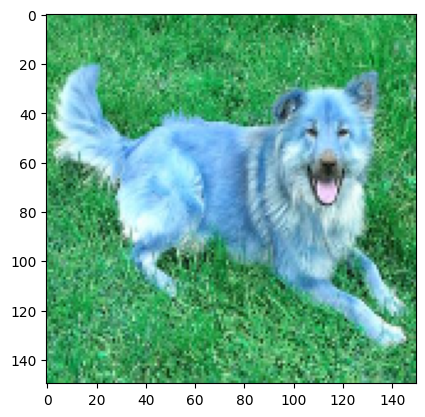

In [3]:
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from keras import backend as K

#cus_model_path = 'repo/cus_vgg16_1a.keras'
cus_model_path = 'repo/tun_vgg16_2a2.keras'

img_width, img_height = 150, 150

# path to the model weights files.
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = tf.keras.models.load_model(cus_model_path)
#model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
import cv2, os
import numpy as np

def get_folder_names(directory_path):
    folder_names = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
    return folder_names

class_label = get_folder_names('./data/train/')
#print("0 is ",class_label[0])
#print("1 is ",class_label[1])

img = 'data/test/4.jpg'
#img = 'data/test/5.jpg'
#img = 'data/test/10.jpg'
img = cv2.imread(img)
img = cv2.resize(img,(img_width,img_height))
img_out = cv2.resize(img,(img_width,img_height))
img = np.reshape(img,[1,img_width,img_height,3])

classes_predict = model.predict(img)
classes = classes_predict[0] 

if classes == 0:
    print(" this is a cat")
elif  classes == 1:
    print("this is a dog")
else:
    print('Unknown')
    print(classes)

import matplotlib.pyplot as plt

plt.imshow(img_out)
plt.show()